# Inspiration

https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Load Required Libraries

In [2]:
#importing numpy and pandas, seaborn

import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt

In [5]:
file = r'D:\github\1-Projects\Projects-ML\Infra-ML19-HousePrices-KCH\kc_house_data.csv'

# Analyse Data of Given Train & Test File

In [6]:
df = pd.read_csv(file)

In [7]:
df.shape

(21613, 21)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [30]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [12]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

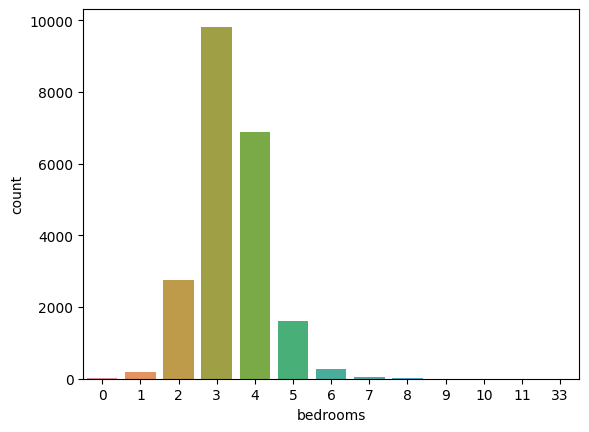

In [123]:
sns.countplot(df, x=df['bedrooms'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

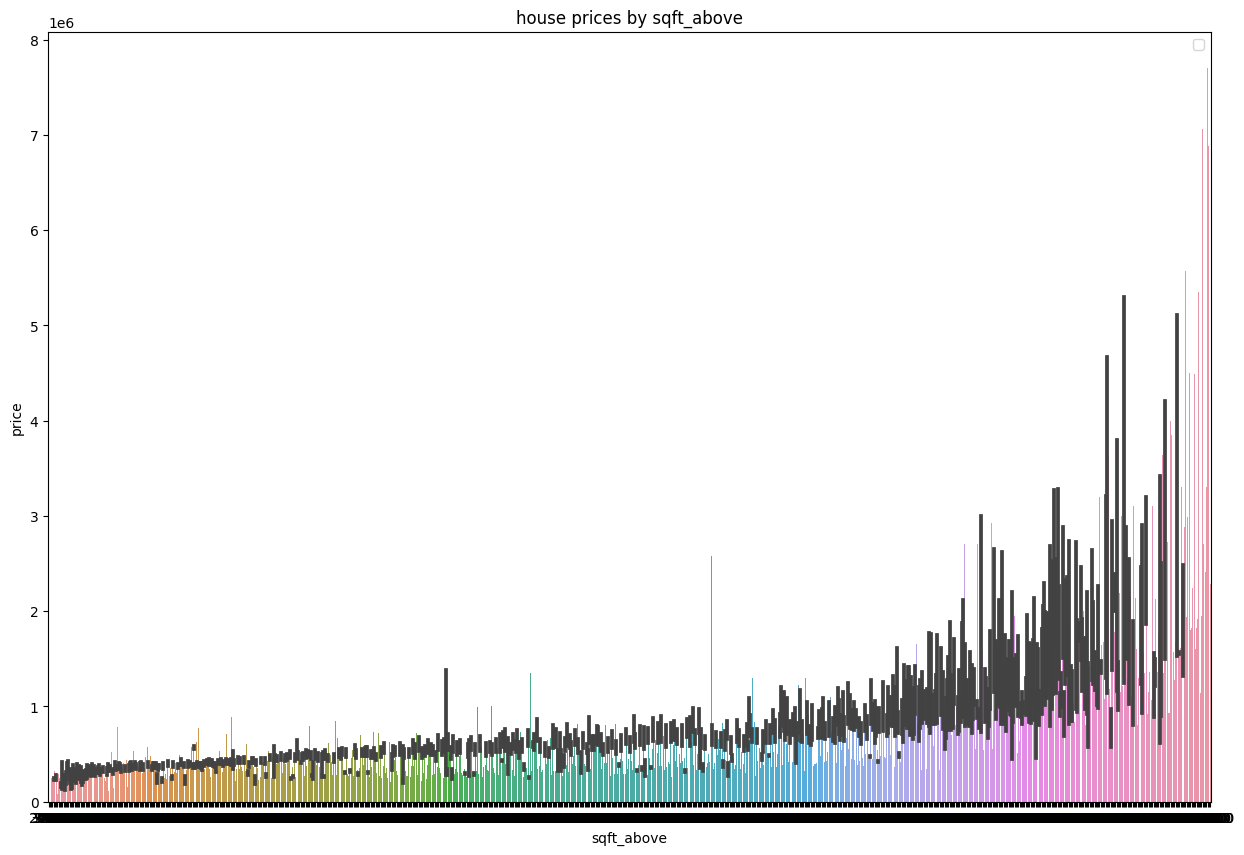

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=df)

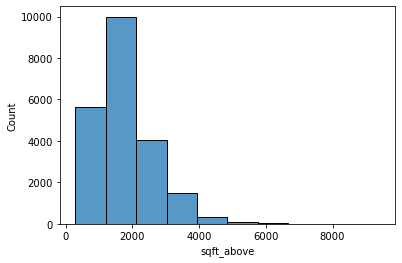

In [45]:
sns.histplot(df['sqft_above'],bins=10)
plt.show()

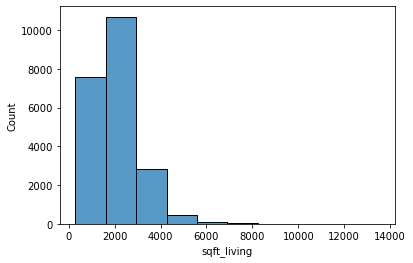

In [46]:
sns.histplot(df['sqft_living'],bins=10)
plt.show()

D:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


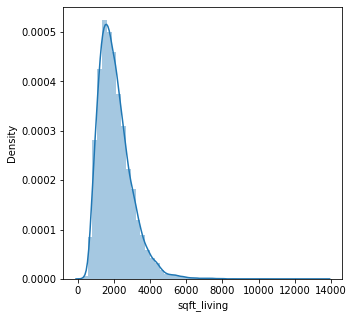

In [49]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)
plt.show()

In [50]:
print('Mean',round(df['sqft_living'].mean(),2))
print('Median',df['sqft_living'].median())
print('Mode',df['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


In [51]:
len(df[df['sqft_living']==1300])

138

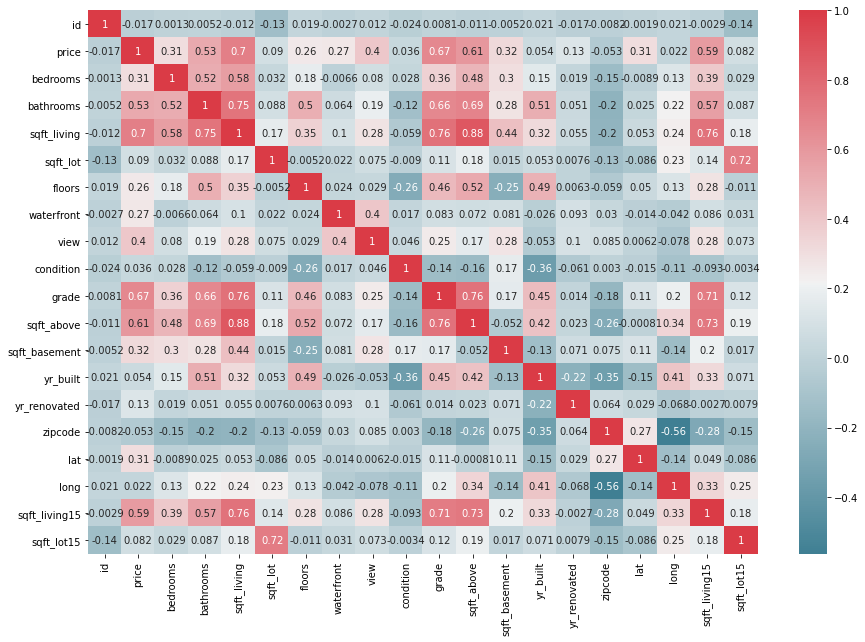

In [52]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [54]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 254289.15
R squared training 0.492
R sqaured testing 0.496
intercept [-47235.8113029]
coefficient [[282.2468152]]


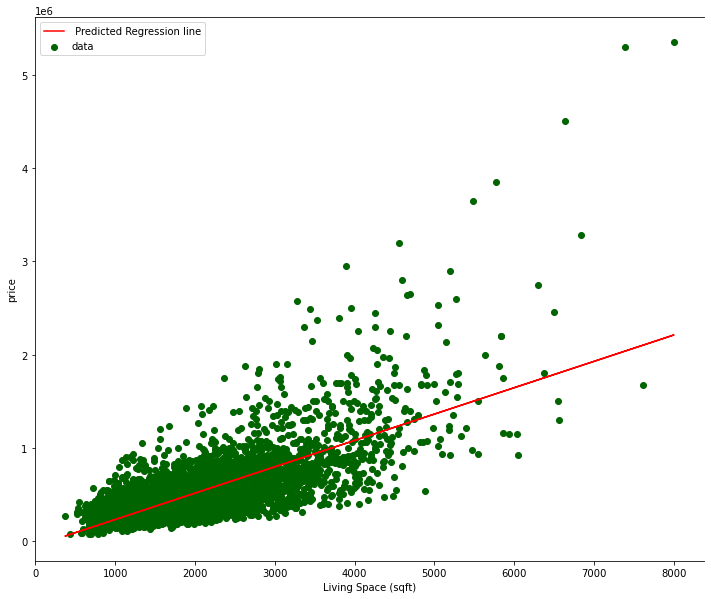

In [55]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [56]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

linear model
squared mean error 263387.61
R squared training 0.442
R squared testing 0.46
intercept [-1061459.62144307]
coeeficient [[209225.48270385]]


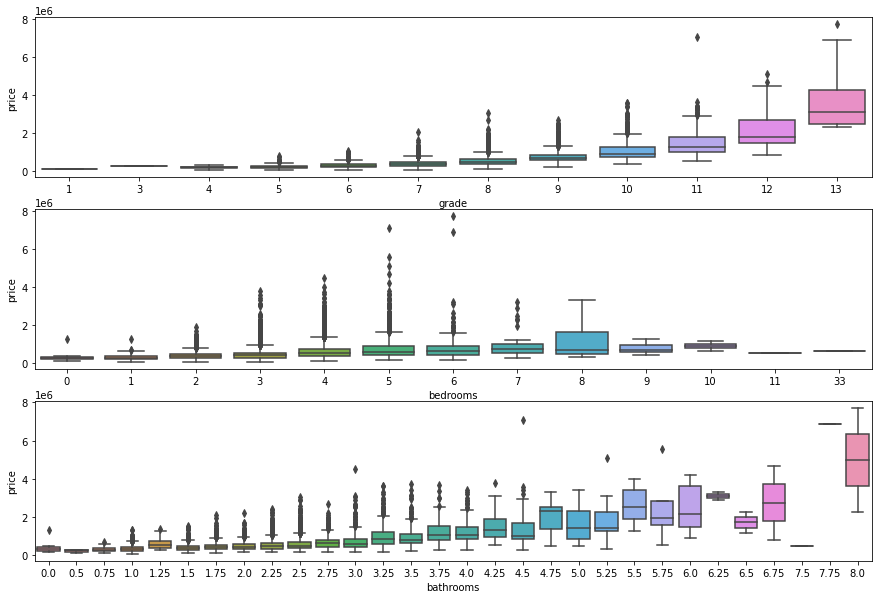

In [58]:
fig,ax=plt.subplots(3,1,figsize=(15,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'],ax=ax[2])

In [62]:
train_data, test_data = train_test_split(df, test_size=.30, train_size=.70, random_state=40)

In [69]:
train_data[features1]

,bedrooms,grade,sqft_living,sqft_above
13355,4,7,2130,1430.0
11095,3,8,1990,1990.0
13406,4,7,1880,1880.0
3257,4,9,2930,2130.0
15850,4,7,1340,1340.0
...,...,...,...,...
11532,5,9,2930,1520.0
16065,4,8,2460,2460.0
14501,3,5,1150,1150.0
14555,3,7,2460,1230.0


In [63]:
features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()

reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:
y = df['price']
X = df.drop(columns=['price'], axis=1)

## Prepare Data for Modelling

In [24]:
X.shape

(21613, 20)

# Train Test Split

In [25]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X, y, test_size=.30, train_size=.70, random_state=40)

In [26]:
print (X_test1.shape)
print (X_train1.shape)
print (y_test1.shape)
print (y_train1.shape)

(6484, 20)
(15129, 20)
(6484,)
(15129,)


In [136]:
cols=X_train1.columns

In [50]:
def vif():
    X = X_train1[cols]
    vif = pd.DataFrame()
    vif['Feature']= X.columns
    vif['vif'] = [variance_inflation_factor(X.values,i) for i in range( X.shape[1]) ]
    vif['vif'] = round(vif['vif'],2)
    vif= vif.sort_values("vif",ascending=False)
    print (vif)

In [51]:
def print_train_score():
    print ("R2 Score               :", round( metrics.r2_score       (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Recall/Senstivity Score:", round( metrics.recall_score   (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Precision Score        :", round( metrics.precision_score(y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Accuracy Score         :", round( metrics.accuracy_score (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("F1 Score               :", round( metrics.f1_score       (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))        

In [52]:
def print_test_score():
    print ("R2 Score               :", round( metrics.r2_score       (y_true= y_test1,y_pred= y_test_result['Pred_Final'])       ,3))
    print ("Recall/Senstivity Score:", round( metrics.recall_score   (y_true= y_test1,y_pred= y_test_result['Pred_Final'])   ,3))
    print ("Precision Score        :", round( metrics.precision_score(y_true= y_test1,y_pred= y_test_result['Pred_Final']),3))
    print ("Accuracy Score         :", round( metrics.accuracy_score (y_true= y_test1,y_pred= y_test_result['Pred_Final']) ,3))
    print ("F1 Score               :", round( metrics.f1_score       (y_true= y_test1,y_pred= y_test_result['Pred_Final'])       ,3))
           

#### Scale Numberic Variables

In [137]:
X_train1[col_num].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
498,20,7800,5,7,1967,2004,450,0,414,864,...,288,64,0,0,0,0,0,0,6,2009
8,50,6120,7,5,1931,1950,0,0,952,952,...,468,90,0,205,0,0,0,0,4,2008
309,20,12378,9,5,2003,2004,1274,0,622,1896,...,708,208,175,0,0,0,0,0,11,2006
957,20,7420,5,5,1962,1962,417,0,640,1057,...,576,0,0,0,0,0,0,0,4,2007
1022,50,9439,5,5,1930,1950,324,0,588,912,...,160,0,0,192,0,0,0,0,3,2007


In [138]:
scaler = StandardScaler()
X_train1[col_num] = scaler.fit_transform(X_train1[col_num])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [139]:
X_train1.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
498,-0.859581,-0.265679,-0.789512,1.304317,-0.147289,0.911495,0.010232,-0.287371,-0.346950,-0.436782,...,0,0,0,1,0,0,0,0,1,0
8,-0.157943,-0.410988,0.642267,-0.494073,-1.337648,-1.694248,-0.953737,-0.287371,0.861916,-0.242389,...,0,0,0,1,1,0,0,0,0,0
309,-0.859581,0.130287,2.074047,-0.494073,1.043070,0.911495,1.775367,-0.287371,0.120418,1.842914,...,0,0,0,1,0,0,0,0,1,0
957,-0.859581,-0.298547,-0.789512,-0.494073,-0.312617,-1.115194,-0.060459,-0.287371,0.160864,-0.010444,...,0,0,0,1,0,0,0,0,1,0
1022,-0.157943,-0.123917,-0.789512,-0.494073,-1.370713,-1.694248,-0.259679,-0.287371,0.044022,-0.330750,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
X_train1[col_num].describe()

### Model with RFE

In [140]:
#from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Importing statsmodels for creating model
import statsmodels.api as sm

# Import variance_inflation_factor To calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import r2_score to get r square score
from sklearn.metrics import r2_score

In [141]:
#Create model using PCA (Principle Component Analysis)
col_all= X_train1.columns
pca    = PCA(svd_solver="randomized",random_state=100)

#Converting normal data to PCA data. Note output is numpy array.
pca_train = pca.fit_transform(X_train1)

#creating dataframe of above PCA data
pca_train = pd.DataFrame(pca_train, columns=col_all, index=X_train1.index)
pca_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
498,-2.312420,-1.109258,-0.948781,0.222739,-1.040932,-0.456205,-1.195863,0.567963,0.327209,0.456808,...,6.383303e-16,-1.133087e-15,4.787726e-16,2.769867e-16,-5.495240e-16,2.689513e-16,-7.620942e-16,6.674768e-16,-4.615549e-16,-1.361153e-16
8,-0.727828,2.601629,1.569629,2.284827,2.629698,1.104598,-0.737493,-0.108445,0.562517,0.179089,...,-3.144483e-16,7.505831e-17,-1.158200e-16,3.811008e-16,-1.660957e-16,8.545041e-16,2.117707e-16,6.936466e-17,-1.469020e-16,3.073071e-16
309,5.409197,-2.406157,1.146931,0.311031,-0.329787,1.035097,1.470681,0.485647,-0.093249,-0.241735,...,-1.734141e-16,2.774758e-16,-2.614829e-16,1.646605e-16,-6.477714e-16,2.116161e-16,7.066386e-18,-5.777670e-16,-8.498946e-17,-9.381241e-17
957,-2.029119,-0.910545,0.189269,1.333800,0.262356,-0.575199,0.728811,-0.794187,0.666770,-0.540413,...,-1.918277e-16,1.930336e-15,-3.222869e-16,-1.145025e-16,-2.455420e-16,4.848683e-16,2.653519e-17,3.867427e-16,5.132475e-16,6.415377e-16
1022,-3.778044,0.655464,0.785200,0.964057,0.382329,1.619964,-0.658078,-0.926874,0.510271,-1.011652,...,-3.539243e-16,4.468352e-17,-1.782322e-16,2.479206e-16,-1.531478e-16,-2.209082e-16,9.381809e-17,1.356213e-16,8.120550e-16,-6.002360e-16


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [78]:
#np.cumsum(pca.explained_variance_ratio_)

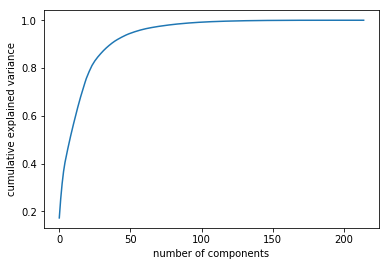

In [142]:
#Making the screeplot - plotting the cumulative variance against the original number of components
fig = plt.figure(figsize = (6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [148]:
pca_train1= pca_train.iloc[::,:60:]

In [143]:
def buildModel(X_data, y_data, number_of_rfe_features, predict=False, train=True, rsquare_train=False):

    if train:
        #Initiate LinearRegression Model Object
        lm = LinearRegression()

        #Fit Model on Train Data
        lm.fit(X_data, y_data)

        #Identify top n features from the dataframe
        rfe = RFE(lm, number_of_rfe_features)             
        rfe = rfe.fit(X_data, y_data)

        #Name of those top n features
        col = X_data.columns[rfe.support_]

        # Creating X_train dataframe with RFE selected variables
        X_train_rfe = X_data[col]

        # Adding a constant variable, because statsmodel.ols 
        #does not have intercept by default and line go through 0,0
        X_train_rfe = sm.add_constant(X_train_rfe)
        
        # Running the linear model
        lm = sm.OLS(y_data,X_train_rfe).fit()
        
        if rsquare_train:
            return r2_score(y_data,lm.predict(X_train_rfe))

    if predict:
        fig = plt.figure(figsize=(15,5))
        
        # Plot heading 
        fig.suptitle('Error Terms', fontsize = 20)  
        plt.subplot(1,2,1)
        #predict the price
        y_train_predict = lm.predict(X_train_rfe)
        
        # Plot the histogram of the error terms
        sns.distplot((y_data - y_train_predict), bins = 20)
        
        # X-label
        plt.xlabel('Errors', fontsize = 18)
        
        # Plot the scattered of the error terms
        plt.subplot(1,2,2)
        sns.scatterplot(y=(y_data - y_train_predict), x=y_train_predict)
        # X-label
        plt.ylabel('Errors', fontsize = 18)
        plt.xlabel("y prediction", fontsize = 18)
        return lm
        
    else:
        #Let's see the summary of our linear model
        print(lm.summary())
        return col, lm

In [144]:
#To avoid these steps again and again. To keep my notebook clean I am putting this in function
#It will give me VIG for X_train_new (this dataframe will keep chaning from one iteration of model to other)
def getVIF(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print (vif)
    return vif

In [145]:
#During model building This function helps in identifying column which should be dropped based on VIF or p-value

#If pvalue_based is True then it will give name of feature which has highest p value
#else it will give name of feature which has higest VIF

def getfeatureName_toDrop(pvalue_based):
    if pvalue_based:
        nm=list(lm.pvalues.sort_values(ascending=False).head(1).index)[0]
        if nm=="const":
            nm=list(lm.pvalues.sort_values(ascending=False).head(2).index)[1]
        return nm
    else:
        return list(vif.Features.head(1))[0]

In [186]:
print(pca_train1.shape)
print (y_train1.shape)

(1021, 47)
(1021,)


In [187]:
n=30
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     152.4
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:52:17   Log-Likelihood:                -12124.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.446e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.812e+05   1104.439    164.

In [155]:
getfeatureName_toDrop(True)

'LandSlope_1'

In [156]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:LandSlope_1
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:29   Log-Likelihood:                -12136.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.449e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          

In [157]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:Street_1
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     148.1
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:30   Log-Likelihood:                -12136.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.449e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.

In [158]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:MSZoning_0
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:31   Log-Likelihood:                -12133.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.448e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [159]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:YrSold
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     149.0
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:32   Log-Likelihood:                -12134.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.448e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.81

In [160]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:LandContour_3
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:33   Log-Likelihood:                -12133.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.448e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const        

In [161]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:LotShape_1
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:34   Log-Likelihood:                -12133.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                     990   BIC:                         2.448e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [162]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:MSZoning_4
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:34   Log-Likelihood:                -12127.
No. Observations:                1021   AIC:                         2.432e+04
Df Residuals:                     990   BIC:                         2.447e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [163]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:LandContour_0
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     152.2
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:35   Log-Likelihood:                -12125.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.446e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const        

In [164]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:Utilities_0
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:42:36   Log-Likelihood:                -12125.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.447e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          

In [166]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:EnclosedPorch
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     152.2
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:43:02   Log-Likelihood:                -12125.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.446e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const        

In [167]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:GarageCars
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.8
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:43:17   Log-Likelihood:                -12126.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.447e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [168]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:MSZoning_1
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.7
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:43:31   Log-Likelihood:                -12126.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.447e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [169]:
dropFeature = getfeatureName_toDrop(True)
print ("Dropping Feature:" +dropFeature)
pca_train1.drop(columns=dropFeature, inplace=True, axis=0)
col,lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=False,train=True,rsquare_train=False)

Dropping Feature:LotConfig_1
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     152.4
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:43:46   Log-Likelihood:                -12124.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     990   BIC:                         2.446e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          

In [185]:
pca_train1.shape

(1021, 47)

In [170]:
vif=getVIF(pca_train1)

          Features  VIF
0       MSSubClass  1.0
35      LotShape_3  1.0
26     ScreenPorch  1.0
27        PoolArea  1.0
28         MiscVal  1.0
29          MoSold  1.0
30      MSZoning_2  1.0
31      MSZoning_3  1.0
32        Street_0  1.0
33      LotShape_0  1.0
34      LotShape_2  1.0
36   LandContour_1  1.0
24     OpenPorchSF  1.0
37   LandContour_2  1.0
38     Utilities_1  1.0
39     LotConfig_0  1.0
40     LotConfig_2  1.0
41     LotConfig_3  1.0
42     LotConfig_4  1.0
43     LandSlope_0  1.0
44     LandSlope_2  1.0
45  Neighborhood_0  1.0
25       3SsnPorch  1.0
23      WoodDeckSF  1.0
1          LotArea  1.0
11        2ndFlrSF  1.0
2      OverallQual  1.0
3      OverallCond  1.0
4        YearBuilt  1.0
5     YearRemodAdd  1.0
6       BsmtFinSF1  1.0
7       BsmtFinSF2  1.0
8        BsmtUnfSF  1.0
9      TotalBsmtSF  1.0
10        1stFlrSF  1.0
12    LowQualFinSF  1.0
22      GarageArea  1.0
13       GrLivArea  1.0
14    BsmtFullBath  1.0
15    BsmtHalfBath  1.0
16        FullBa

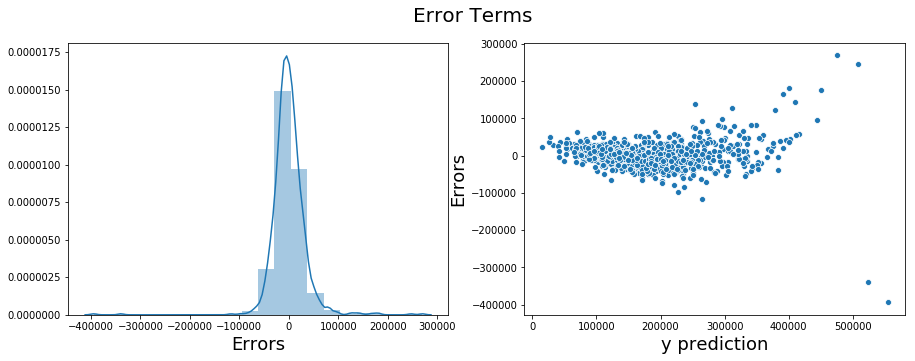

In [171]:
lm=buildModel(pca_train1, y_train1, number_of_rfe_features=n,predict=True,train=True)
#Errors are normally distributed equally around 0. It is little right tailed.
#Erros are white noise.
#Errors terms have homoscedastisity

#### Test Model

In [172]:
X_test1.shape

(438, 215)

In [213]:
cols_final = list(lm.params.index)
cols_final.remove("const")

In [214]:
print (pca_test.shape)
print (pca_train1.shape)
print (X_test1.shape)
print (len(cols_final))

(438, 215)
(1021, 47)
(438, 215)
30


In [215]:
pca_Test1.shape

(438, 30)

Text(0, 0.5, 'y_pred')

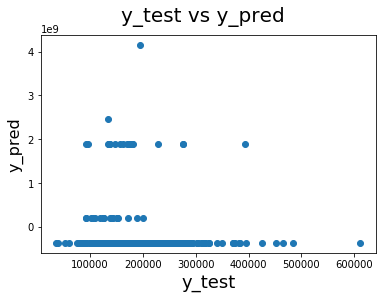

In [217]:
# Making predictions
xCols=X_test1.columns
X_test1[col_num] = scaler.transform(X_test1[col_num])

pca_test=pca.transform(X_test1)
pca_test = pd.DataFrame(pca_test, columns=xCols, index=X_test1.index)
pca_test1 = pca_test[cols_final]

y_pred = lm.predict(  sm.add_constant(pca_test1))

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test1,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [218]:
buildModel(X_test1, y_test1, number_of_rfe_features=n,predict=True,train=True, rsquare_train=True)

0.4910161485018977

In [222]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

xgb = XGBRegressor(n_estimators = 500, 
                   learning_rate=0.05, 
                   subsample= 0.75, 
                   colsample_bytree = 0.63
                       )
kf = KFold(n_splits=5)
y_pred = cross_val_score(xgb, pca_train1, y_train1, cv=kf, n_jobs=-1)
y_pred.mean()

0.8567331034294389

In [223]:
kf = KFold(n_splits=5)
y_pred = cross_val_score(xgb, pca_test1, y_test1, cv=kf, n_jobs=-1)
y_pred.mean()

0.6678839076737362

In [ ]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": final_predictions
    })
submission.to_csv('submission.csv', index=False)